In [39]:
# Packages: We only need two packages for this script. The first is the dune analytics package which can be found here:
# https://github.com/itzmestar/duneanalytics
# Massive credit to the creator of the duneanalytics package (itzmestar) . your work has helped me significantly
# The second is Pandas

from duneanalytics import DuneAnalytics
import pandas as pd
# initialize client. This simply means log into your dune analytics account. ('username','password')
dune = DuneAnalytics('Tachikoma000', 'iZ7kUnw!B8!XUTe')
# try to login
dune.login()
# fetch token
dune.fetch_auth_token()
# fetch query result id using query id. https://dune.xyz/queries/29153/58862 . Observe the location of the query number on
# the url
result_id = dune.query_result_id(query_id=29153)
# fetch query result
data = dune.query_result(result_id)
# assign the results to a pandas data frame. You can stop here technically. But depending on your query, you might
# need to do some more unpacking and clean up
df = pd.DataFrame(data)

{'data': {'get_result': {'job_id': None, 'result_id': '9c1dd153-b8e5-4071-bd51-dbabbbded3cf', '__typename': 'get_result_response'}}}
{'data': {'query_results': [{'id': '9c1dd153-b8e5-4071-bd51-dbabbbded3cf', 'job_id': 'bd77a537-810f-4542-8b95-e6ce8d6a7939', 'error': None, 'runtime': 5, 'generated_at': '2021-11-30T23:53:38.459769+00:00', 'columns': ['date', 'treasury_rfv', 'lusd_rfv', 'frax_rfv', 'dai_rfv'], '__typename': 'query_results'}], 'get_result_by_result_id': [{'data': {'dai_rfv': 86577803.37424314, 'date': '2021-11-30T00:00:00+00:00', 'frax_rfv': 15290766.634254556, 'lusd_rfv': 79600614.85414377, 'treasury_rfv': 181469184.86264145}, '__typename': 'get_result_template'}, {'data': {'dai_rfv': 85876939.47986348, 'date': '2021-11-29T00:00:00+00:00', 'frax_rfv': 15286861.812185531, 'lusd_rfv': 79600517.39055596, 'treasury_rfv': 180764318.68260497}, '__typename': 'get_result_template'}, {'data': {'dai_rfv': 85829411.65676825, 'date': '2021-11-28T00:00:00+00:00', 'frax_rfv': 15136652.

In [40]:
# I know the data comes in as a dict of dicts, so I have cleaned up the data and created columns
df = df['data']['get_result_by_result_id']

In [41]:
# More unpacking and formatting
df2 = pd.DataFrame(df)

In [42]:
# Let's look at the data and see if we like the form
df2['data']

0      {'dai_rfv': 86577803.37424314, 'date': '2021-1...
1      {'dai_rfv': 85876939.47986348, 'date': '2021-1...
2      {'dai_rfv': 85829411.65676825, 'date': '2021-1...
3      {'dai_rfv': 85021767.84609343, 'date': '2021-1...
4      {'dai_rfv': 84425756.02922261, 'date': '2021-1...
                             ...                        
248    {'dai_rfv': 70637.27058589339, 'date': '2021-0...
249    {'dai_rfv': 69741.78140463473, 'date': '2021-0...
250    {'dai_rfv': 68962.80579351318, 'date': '2021-0...
251    {'dai_rfv': 68260.0, 'date': '2021-03-24T00:00...
252    {'dai_rfv': 68260.0, 'date': '2021-03-23T00:00...
Name: data, Length: 253, dtype: object

In [43]:
# I like to work with serialized data
df2 = df2["data"].apply(pd.Series)

In [44]:
df2

,dai_rfv,date,frax_rfv,lusd_rfv,treasury_rfv
0,8.657780e+07,2021-11-30T00:00:00+00:00,1.529077e+07,7.960061e+07,1.814692e+08
1,8.587694e+07,2021-11-29T00:00:00+00:00,1.528686e+07,7.960052e+07,1.807643e+08
2,8.582941e+07,2021-11-28T00:00:00+00:00,1.513665e+07,7.960027e+07,1.805663e+08
3,8.502177e+07,2021-11-27T00:00:00+00:00,1.500515e+07,7.960014e+07,1.796271e+08
4,8.442576e+07,2021-11-26T00:00:00+00:00,1.495060e+07,7.960010e+07,1.789765e+08
...,...,...,...,...,...
248,7.063727e+04,2021-03-27T00:00:00+00:00,0.000000e+00,0.000000e+00,7.063727e+04
249,6.974178e+04,2021-03-26T00:00:00+00:00,0.000000e+00,0.000000e+00,6.974178e+04
250,6.896281e+04,2021-03-25T00:00:00+00:00,0.000000e+00,0.000000e+00,6.896281e+04
251,6.826000e+04,2021-03-24T00:00:00+00:00,0.000000e+00,0.000000e+00,6.826000e+04


In [45]:
df2 = df2[['date','treasury_rfv','lusd_rfv','frax_rfv','dai_rfv']]

<AxesSubplot:xlabel='date'>

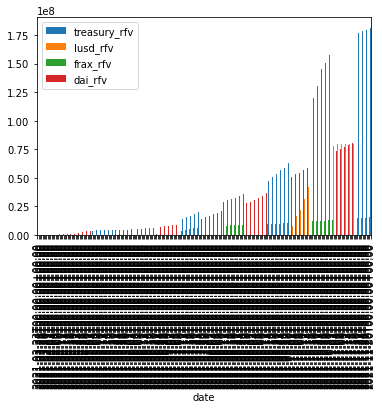

In [48]:
df2
rslt_df = df2.sort_values(by = 'date')
rslt_df.plot(x="date", y=["treasury_rfv", "lusd_rfv", "frax_rfv", 'dai_rfv'], kind="line")

In [52]:
import streamlit as st
st.area_chart(rslt_df)

StreamlitAPIException: ("Expected bytes, got a 'float' object", 'Conversion failed for column value with type object')